# Introduction

In this code, we will be demonstrating some aspects and methods of feature engineering, namely:

1. Mean
2. Normalization

We will also be demonstrating two forms of Normalization, namely:

1. Standard Scaler Normalization
2. MinMax Scaler Normalization

The dataset used in this code is in .csv format and gives information on ratings of Starbucks branches given by customers based on different factors and service offered by the coffee giant.

To analyse the dataset, we shall first begin with importing the relevant packages.

In [1]:
#For data manipulation and analysis.
import pandas as pd
#For numerical operations on arrays and matrices
import numpy as np
#For creating visualizations and plots.
import matplotlib.pyplot as plt

The next step will be to import the dataset in question and display the first five entries of the dataset to study its contents and define the variables based on the values and ratings.

In [2]:
#importing and displaying the dataset
starbucks = pd.read_csv("https://raw.githubusercontent.com/aleenababy/AI-and-Machine-learning-lecture/main/Feature%20Engineering/Starbucks%20customer%20data/starbucks_customers.csv", delimiter = ";")
starbucks.head()

,spent,nearest_starbucks,age,rate_quality,rate_price,rate_promo,ambiance,wifi,service,meetings_hangout
0,13,8,52,4,4,4,4,4,4,4
1,25,8,35,4,5,5,4,4,3,3
2,10,8,29,2,1,5,2,2,2,2
3,7,8,28,4,1,4,5,3,3,4
4,10,8,28,4,2,4,4,3,4,3


## Description of the Dataset

From the information that we have received from the dataset, we have found that the dataset has 10 variables, each of which have 122 entries. All of them are of type '64-bit interger' type:
1. spent: Money spent on the meal            
2. nearest_starbucks: Starbucks branch closest to locations relevant to customers  
3. age : Age of customers        
4. rate_quality : freshness and taste of the food items      
5. rate_price : satisfaction with the price range of products     
6. rate_promo : satisfaction with the promotional codes provided by Starbucks. 
7. ambiance :satisfaction with the interior design of the outlet           
8. wifi : satisfaction with the wifi strength and speed.              
9. service :satisfaction of customer service            
10. meetings_hangout :comfort level of dining inside the outlets.

In [3]:
#find information on the imported dataset
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   spent              122 non-null    int64
 1   nearest_starbucks  122 non-null    int64
 2   age                122 non-null    int64
 3   rate_quality       122 non-null    int64
 4   rate_price         122 non-null    int64
 5   rate_promo         122 non-null    int64
 6   ambiance           122 non-null    int64
 7   wifi               122 non-null    int64
 8   service            122 non-null    int64
 9   meetings_hangout   122 non-null    int64
dtypes: int64(10)
memory usage: 9.7 KB


## Missing Values

Before we perform some feature engineering on the values in the dataset, it is imperative to make sure that there are no missing values in the dataset. We check for any missing values in the dataset, as well as the total number of missing values in each dataset. As per observation, there are no missing values in any entries of any variable.

In [4]:
#check for missing values
starbucks.isnull().sum()

spent                0
nearest_starbucks    0
age                  0
rate_quality         0
rate_price           0
rate_promo           0
ambiance             0
wifi                 0
service              0
meetings_hangout     0
dtype: int64

## Feature Engineering

We shall demonstrate finding the mean of all the values in the variable 'age'. In the variable 'age', a range of values of the age of customers is provided. The mean of the ages are calculated by subtracting the age of the youngest person from the age of the oldest person. The maximum age is 70 years and the minumum age is 13 years, hence the mean value is 70 - 13 = 57 years.

In [5]:
#to find the mean of the ages of people buying coffee
age = starbucks["age"]
print(max(age))
print(min(age))
age_mean = np.mean(max(age) - min(age))
age_mean

70
13


57.0

## Checking Frequency of 'Age'

Since feature engineering is being performed on 'Age', we shall check the distribution of the values in the variable to determine the age demographic of customers who frequents Starbucks. We write a code that plots the 'Count' vs 'Age', which gives a histogram of the 'Age' frequency, with a scale of 1 unit = 10 years on the X-axis and 1 unit = 5 on the Y-axis. From the graph, it is evident that the majority of the demographic of the customers is between the ages of 20 years and 30 years, whereas the ages between 55 years and 65 years do not go to Starbucks.

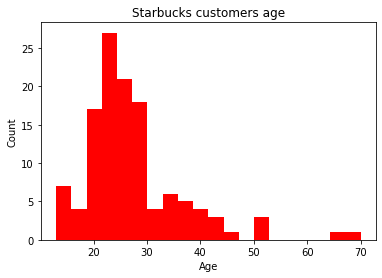

In [6]:
#to find the distribution of the age of customers with a histogram
plt.hist(age, bins = 20, color = 'r')
plt.title('Starbucks customers age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('./starbucks_customers_age.png', dpi = 100)
plt.show()

## Plotting the Standard Deviation of 'Age'

Standard Deviation is the deviation of the age of the customers from the mean age, which is denoted by 'age - age_mean', where 'age' is the age of the respective customer and 'age_mean' is the value of the mean age of all customers, combined. We write a code that plots the 'Count' vs 'Deviated Age', which gives a histogram of the deviation of 'Age' frequency, with a scale of 1 unit = 10 years on the X-axis and 1 unit = 5 on the Y-axis. The output shows maximum deviation from age to be between -40 years and -30 years, whilst there are no customers around the mean deviation. The deviation curve seems to be an inverted bell curve with maximum concentration between -40 and -30 years deviation.

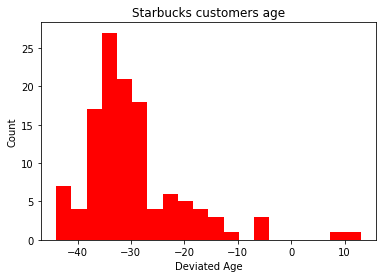

In [7]:
#to find the values by which the ages divert from the mean age and plot a histogram distribution to detect outliers in the 'age' variable values
centered_age = age - age_mean
plt.hist(centered_age, bins = 20, color = 'r')
plt.title('Starbucks customers age')
plt.xlabel('Deviated Age')
plt.ylabel('Count')
plt.savefig('./starbucks_customers_age_centered.png', dpi = 100)
plt.show()

## Standard Normalization

Standard normalization, also known as standardization or z-score normalization, is a method used to transform data so that it has a mean of 0 and a standard deviation of 1. This is commonly done to ensure that each feature contributes equally to the model, especially in machine learning algorithms that rely on distance calculations, such as k-nearest neighbors or support vector machines. The formula to standardize a dataset is:

𝑧 = (𝑥 − 𝜇) / 𝜎

Where:

𝑧 : the standardized value.
𝑥 : the original value.
𝜇 : the mean of the dataset.
𝜎 : the standard deviation of the dataset.

Here, we perform standard normalization on the values of the variable 'age'. We find the values of Standard Mean and Standard Normal of the values of 'Age'. The Standard Mean of values of 'Age' is 1.601633215852685e-16 and the Standard Normal is 1.

In [8]:
#to normalize ages by standard normalization
standard_ages = (age - np.mean(age))/(np.std(age))
standard_mean = np.mean(standard_ages)
standard_normal = np.std(standard_ages)
standard_ages
print(standard_mean)
print(standard_normal)

1.601633215852685e-16
1.0000000000000002


## Standard Scaler Scaling and Fitting

The StandardScaler is a feature scaling technique provided by the sklearn.preprocessing module in the Scikit-Learn library for Python. It standardizes features by removing the mean and scaling to unit variance, which results in a dataset with a mean of 0 and a standard deviation of 1 for each feature. This is done for the values of the variable 'Age', and then, the Standard Mean and Standard Normal of the scaled values are calculated. 

First, the object for Standard Scaling is initialized as 'scaler'. The values of the variable 'Age' is first reshaped into an array and then fitted into 'scaler'. The scaled values is saved in the variable 'ages_scaled' and the Standard Mean and Standard Normal of the scaled data. The Standard Mean of the scaled data is 1.7290358580227847e-16 and the Standard Normal of the scaled data is 0.9999999999999999.

In [9]:
#Create an object for Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
#reshape and scale the age variable
ages_reshape = np.array(age).reshape(-1,1)
ages_scaled = scaler.fit_transform(ages_reshape)
print(np.mean(ages_scaled))
print(np.std(ages_scaled))

1.7290358580227847e-16
0.9999999999999999


## MinMax Scaler

The MinMaxScaler is another feature scaling technique provided by the sklearn.preprocessing module in the Scikit-Learn library for Python. It transforms features by scaling each feature to a given range, typically between 0 and 1. This is particularly useful when you want to ensure that all features contribute equally to the distance calculations in algorithms like k-nearest neighbors or neural networks.

First, the 'spent' column from the starbucks DataFrame is extracted and stored in the variable 'spent'. The 'spent' column presumably contains the amount of money spent by customers at Starbucks. This line normalizes the spent variable. Normalization is a technique to adjust the range of values so they fit within a specific scale, typically between 0 and 1. This is done using the formula:

spent_normal = (spent − min(spent))/(max(spent) − min(spent))
 
min(spent): Finds the minimum value in the spent column.
max(spent): Finds the maximum value in the spent column.

spent - min(spent): Subtracts the minimum value from each element in the spent column. (max(spent) - min(spent)): The range of the spent values (i.e., the difference between the maximum and minimum values). The result is that each value in spent is transformed to a value between 0 and 1, where 0 corresponds to the minimum value and 1 corresponds to the maximum value in the original spent data.

In [11]:
#prepare and normalize the spent variable for scaling and find the amount of money spent on coffee according to age
spent = starbucks['spent']
spent_normal = (spent - min(spent))/(max(spent) - min(spent))
spent_normal

0      0.464286
1      0.892857
2      0.357143
3      0.250000
4      0.357143
         ...   
117    0.178571
118    0.571429
119    0.071429
120    0.678571
121    0.107143
Name: spent, Length: 122, dtype: float64

This code imports the MinMaxScaler class from Scikit-Learn's preprocessing module, which is used for scaling features to a specified range. This creates an instance of the MinMaxScaler. By default, it scales the data to the range [0, 1]. Here, the age data (which is presumably a 1-dimensional array or list) is converted to a NumPy array and then reshaped into a 2-dimensional array with one column. Thenmreshaping is necessary because the MinMaxScaler expects a 2D array as input, where each feature is a column. This fits the MinMaxScaler to the spent_reshape data and then transforms it. The fit_transform method does both fitting and transforming in one step. Since we are using MinMaxScaler, the expected output should be 0 and 1, respectively.

In [12]:
#since this normalizes price range, we shall normalize it using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

In [13]:
#reshape and scale the age variable
spent_reshape = np.array(age).reshape(-1,1)
spent_scaled = mmscaler.fit_transform(ages_reshape)
print(np.min(spent_scaled))
print(np.max(spent_scaled))

0.0
0.9999999999999998


## Plotting the Distribution of the ages of Customers

The code finds and prints the minimum and maximum ages of the customers. The ages are categorized into bins: 
[[12, 20), [20, 30), [30, 40), [40, 71).]

The code assigns each age to a bin and prints the first 10 binned ages. A bar graph is plotted showing the count of customers in each age bin.

The graph shows that the maximum range of ages of customer for starbucks is the maximum with a coount of almost 80, while the age range that garners the least number of customers lies between the 12 and 20, as well as between 40 and 71.

13 70
0    [40, 71)
1    [30, 40)
2    [20, 30)
3    [20, 30)
4    [20, 30)
5    [20, 30)
6    [20, 30)
7    [20, 30)
8    [20, 30)
9    [20, 30)
Name: binned_ages, dtype: category
Categories (4, interval[int64, left]): [[12, 20) < [20, 30) < [30, 40) < [40, 71)]


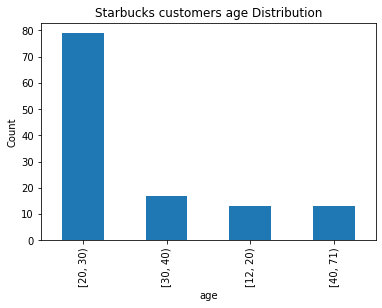

In [14]:
#find the minimum and maximum ages of the customers buying coffee at Starbucks
print(np.min(age), np.max(age))

age_bins = [12, 20, 30, 40, 71]

starbucks["binned_ages"] = pd.cut(starbucks['age'], age_bins, right = False)
print(starbucks["binned_ages"].head(10))

# Plot the bar graph of binned distances
starbucks['binned_ages'].value_counts().plot(kind='bar')

# Label the bar graph
plt.title('Starbucks customers age Distribution')
plt.xlabel('age')
plt.ylabel('Count')

# Show the bar graph
plt.show()

## The Updated Dataset

A new column is added to the existing dataset 'Starbucks', named 'binned_ages'. The respective binned age corresponds to the age that is binned within the range.

In [15]:
starbucks

,spent,nearest_starbucks,age,rate_quality,rate_price,rate_promo,ambiance,wifi,service,meetings_hangout,binned_ages
0,13,8,52,4,4,4,4,4,4,4,"[40, 71)"
1,25,8,35,4,5,5,4,4,3,3,"[30, 40)"
2,10,8,29,2,1,5,2,2,2,2,"[20, 30)"
3,7,8,28,4,1,4,5,3,3,4,"[20, 30)"
4,10,8,28,4,2,4,4,3,4,3,"[20, 30)"
...,...,...,...,...,...,...,...,...,...,...,...
117,5,0,22,3,4,5,4,3,4,2,"[20, 30)"
118,16,0,22,4,3,5,4,4,5,5,"[20, 30)"
119,2,0,20,4,3,5,5,4,4,3,"[20, 30)"
120,19,0,20,4,4,4,4,4,4,4,"[20, 30)"


# Conclusion

In this code, we have performed feature engineering on the features of 'Age' and 'Spendt', for the purpose of studying the pattern and distribution of customer demographics who are instrumental in growing Starbucks's business. It shows that the key demographic lies between the ages of 20 and 30 years of age and the distribution of customers lies between the ages of 12 years and 71 years. This information can be crucial in future product preferences and determination of optimal locations to grow the business.